# Lab 11
## Krzysztof Kołodziejczyk
### 05.06.2024

![Zadanie_1](./1.png)


In [14]:
import pandas as pd

data = pd.read_csv("./WineQT.csv")

print(data.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

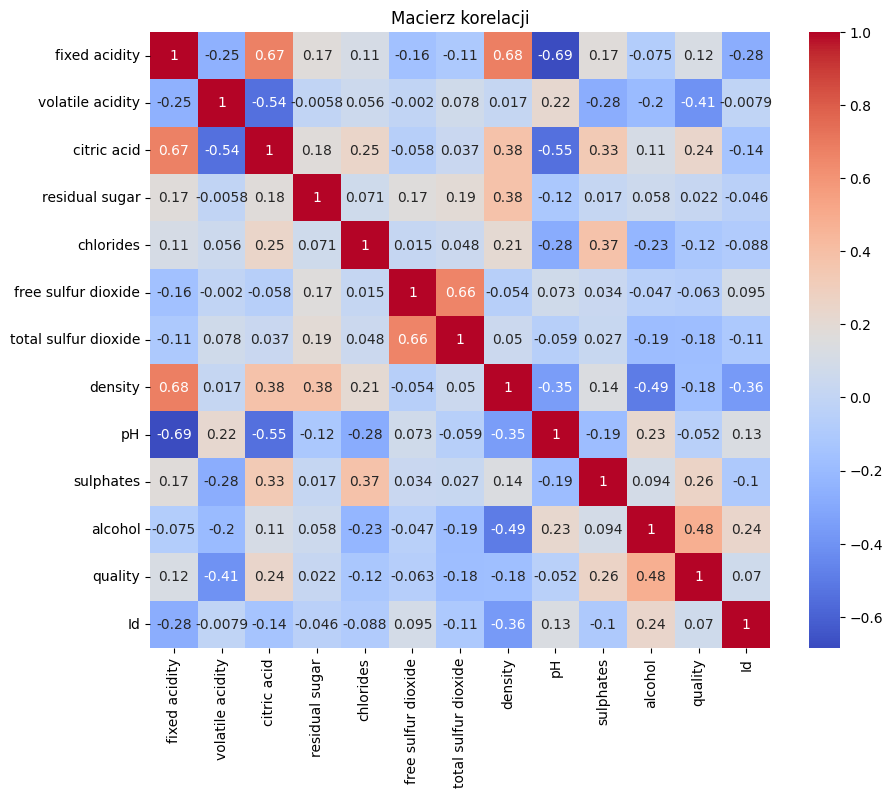

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(columns=['density'])
y = data['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 7.099379121843963e-07
R^2 Score: 0.8143437217881665


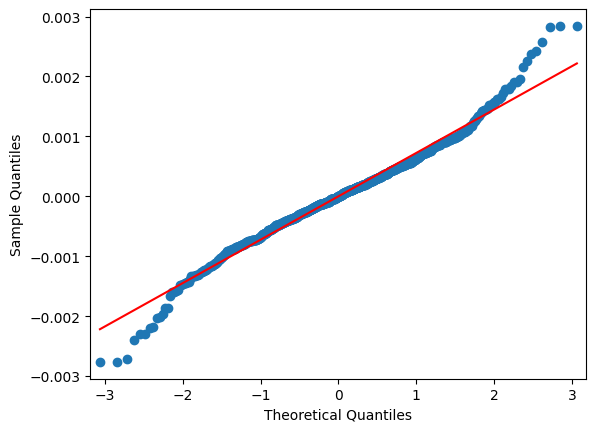

Durbin-Watson: 1.9448093282017391
                 feature         VIF
0          fixed acidity   44.056194
1       volatile acidity   18.815905
2            citric acid    9.264177
3         residual sugar    5.197090
4              chlorides    6.285226
5    free sulfur dioxide    6.708514
6   total sulfur dioxide    6.405020
7                     pH  178.176134
8              sulphates   24.290648
9                alcohol  159.753468
10               quality   76.274939
11                    Id    5.004461


In [17]:
import statsmodels.api as sm
import numpy as np

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

residuals = y_train - model.predict(X_train)
sm.qqplot(residuals, line='s')
plt.show()

print('Durbin-Watson:', sm.stats.stattools.durbin_watson(residuals))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data)


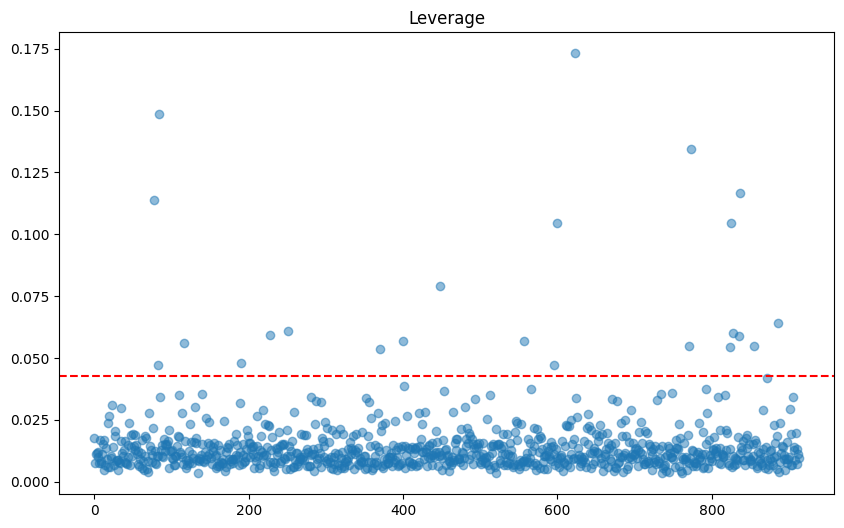

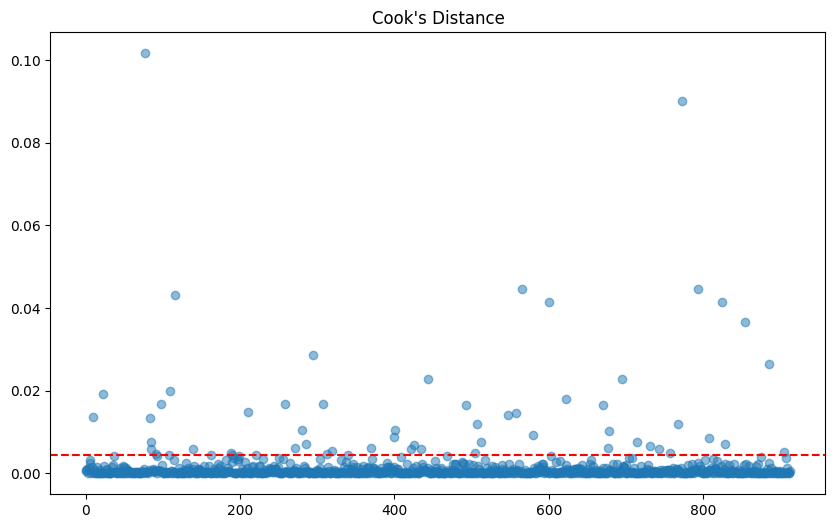

In [18]:
influence = model_sm.get_influence()
leverage = influence.hat_matrix_diag
cooks = influence.cooks_distance[0]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(leverage)), leverage, alpha=0.5)
plt.axhline(y=3*np.mean(leverage), color='r', linestyle='--')
plt.title('Leverage')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(cooks)), cooks, alpha=0.5)
plt.axhline(y=4/(len(X_train)-len(X_train.columns)-1), color='r', linestyle='--')
plt.title('Cook\'s Distance')
plt.show()


In [19]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))


Shapiro-Wilk Test: Statistics=0.981, p=0.000
